In [38]:
import Pkg

Pkg.add("LinearAlgebra")
Pkg.add("Distributions")
Pkg.add("Plots")
Pkg.add("LaTeXStrings")
Pkg.add("CSV")
Pkg.add("Random")
Pkg.add("DataFrames")

using LinearAlgebra
using Distributions, Random
using Plots, LaTeXStrings
using CSV
using DataFrames
using Statistics

   Resolving package versions...
  No Changes to `~/INI/Translational Neuromodeling/Translational_Neuromodeling_Exercise_1/ex-03/Project.toml`
  No Changes to `~/INI/Translational Neuromodeling/Translational_Neuromodeling_Exercise_1/ex-03/Manifest.toml`
   Resolving package versions...
  No Changes to `~/INI/Translational Neuromodeling/Translational_Neuromodeling_Exercise_1/ex-03/Project.toml`
  No Changes to `~/INI/Translational Neuromodeling/Translational_Neuromodeling_Exercise_1/ex-03/Manifest.toml`
   Resolving package versions...
  No Changes to `~/INI/Translational Neuromodeling/Translational_Neuromodeling_Exercise_1/ex-03/Project.toml`
  No Changes to `~/INI/Translational Neuromodeling/Translational_Neuromodeling_Exercise_1/ex-03/Manifest.toml`
   Resolving package versions...
  No Changes to `~/INI/Translational Neuromodeling/Translational_Neuromodeling_Exercise_1/ex-03/Project.toml`
  No Changes to `~/INI/Translational Neuromodeling/Translational_Neuromodeling_Exercise_1/ex-03

# Exercise 3: DCM for EEG

## Exercise 3.1

In the convolution-based DCM for ERP formalism, the post-synaptic potential $v(t)$ arises from a convolution of the presynaptic firing $\sigma(t)$ with a convolution kernel $h(t)$, i.e.

$$
v(t) = h(t) \otimes \sigma(t) \;=\; \int_{-\infty}^{t} h(t - \tau)\,\sigma(\tau)\,d\tau,
\tag{1}
$$

with

$$
h(t) =
\begin{cases}
H\,\kappa\,t\,e^{-\kappa t}, & t \ge 0, \\
0, & \text{otherwise}.
\end{cases}
\tag{2}
$$

In this exercise, derive the generic second-order differential equations underlying the convolution-based DCM for EEG models:

$$
\ddot{v}(t)
= H \,\kappa\,\sigma(t)
\;-\; 2\,\kappa\,\dot{v}(t)
\;-\; \kappa^2\,v(t).
\tag{3}
$$

**Hint**: Use Leibniz’ rule for differentiation.



## 1. The General Leibniz Rule

Suppose we have a function

$$
I(t) \;=\; \int_{a(t)}^{b(t)} f\bigl(t,\tau\bigr)\,d\tau,
$$

where $a(t)$ and $b(t)$ are time‐dependent limits. **Leibniz’ rule** states:

$$
\frac{d}{dt}\bigl[I(t)\bigr]
\;=\;
f\bigl(t,b(t)\bigr)\,\frac{d}{dt}b(t)
\;-\;
f\bigl(t,a(t)\bigr)\,\frac{d}{dt}a(t)
\;+\;
\int_{a(t)}^{b(t)}
\frac{\partial}{\partial t}f\bigl(t,\tau\bigr)\,d\tau.
$$

---

## 2. Special Case: Lower Limit Constant, Upper Limit $t$

A common **special case** is $a(t)=a$ (a constant) and $b(t)=t$. Then:

- $\frac{d}{dt}a(t)=0$
- $\frac{d}{dt}b(t)=1$

Hence the formula simplifies to

$$
\frac{d}{dt}\Bigl(\,\int_{a}^{t} f\bigl(t,\tau\bigr)\,d\tau\Bigr)
\;=\;
f\bigl(t,t\bigr)
\;+\;
\int_{a}^{t}
\frac{\partial}{\partial t}f\bigl(t,\tau\bigr)\,d\tau.
$$

In our exercise, $a=-\infty$ (a constant limit, albeit an improper one) and $b(t)=t$. We can thus use this special‐case form directly.

---

## 3. Why the Special Case Applies to the Exercise

In **Equation (1)** of the exercise, we have

$$
v(t)
\;=\;
\bigl[h \otimes \sigma\bigr](t)
\;=\;
\int_{-\infty}^{t}
h\bigl(t-\tau\bigr)\,\sigma(\tau)\,d\tau.
$$

Here:
- The **lower limit** of integration is $-\infty$, a constant.  
- The **upper limit** is $t$.  

Thus, we can apply the special‐case Leibniz rule by identifying

$$
f\bigl(t,\tau\bigr)
\;=\;
h\bigl(t-\tau\bigr)\,\sigma(\tau).
$$

---

## 4. Differentiating $v(t)$ Twice & Rearranging

### 4.1 First Derivative

Applying the special‐case rule:

$$
\frac{d}{dt}\Bigl(\int_{-\infty}^{t} h\bigl(t-\tau\bigr)\,\sigma(\tau)\,d\tau\Bigr)
\;=\;
h\bigl(t-t\bigr)\,\sigma(t)
\;+\;
\int_{-\infty}^{t}
\frac{\partial}{\partial t}\Bigl[h\bigl(t-\tau\bigr)\,\sigma(\tau)\Bigr]\,d\tau.
$$

- The term $h\bigl(t-t\bigr)=h(0)$. In **Equation (2)**, $h(0)=H\,\kappa\,(0)\,e^{-\,\kappa\cdot 0}=0$, so the boundary term vanishes.  
- $\sigma(\tau)$ does not depend on $t$, hence we only differentiate $h\bigl(t-\tau\bigr)$.  

Thus,

$$
\dot{v}(t)
\;=\;
\int_{-\infty}^{t}
h'\bigl(t-\tau\bigr)\,\sigma(\tau)\,d\tau.
$$

### 4.2 Second Derivative

Repeat:

$$
\ddot{v}(t)
\;=\;
\frac{d}{dt}\Bigl[\int_{-\infty}^{t} h'\bigl(t-\tau\bigr)\,\sigma(\tau)\,d\tau\Bigr]
\;=\;
h'\bigl(t-t\bigr)\,\sigma(t)
\;+\;
\int_{-\infty}^{t}
\frac{\partial}{\partial t}\Bigl[h'\bigl(t-\tau\bigr)\Bigr]\sigma(\tau)\,d\tau.
$$

- Now $h'(0)=H\,\kappa$.  
- Thus, the boundary term is $H\,\kappa\,\sigma(t)$.  

Hence,

$$
\ddot{v}(t)
\;=\;
\int_{-\infty}^{t}
h''\bigl(t-\tau\bigr)\,\sigma(\tau)\,d\tau
\;+\;
H\,\kappa\,\sigma(t).
$$

### 4.3 Rearranging to Get **Equation (3)** using Laplace Transform

#### 4.3.1 Take the Laplace Transform of $h(t)$

Recall the (one‐sided) Laplace transform $\mathcal{L}\{f(t)\}(s)$ is

$$
\mathcal{L}\{f(t)\}(s)
\;=\;
\int_{0}^{\infty}
f(t)\,e^{-st}\,dt,
$$

for functions $f(t)$ supported on $t\ge0$. Here, $h(t)$ is already zero for $t<0$, so

$$
\mathcal{L}\bigl\{h(t)\bigr\}(s)
\;=\;
\int_{0}^{\infty}
\bigl[H\,\kappa\,t\,e^{-\kappa t}\bigr]
\,e^{-st}\,dt
\;=\;
H\,\kappa
\int_{0}^{\infty}
t\,e^{-(\kappa + s)\,t}\,dt.
$$

#### 4.3.2 Evaluate the Integral

We recognize this as a standard Laplace integral:

$$
\int_{0}^{\infty}
t\,e^{-\alpha t}\,dt
\;=\;
\frac{1}{\alpha^2},
\quad\text{for } \alpha>0.
$$

Here, $\alpha = \kappa + s$, so

$$
\int_{0}^{\infty}
t\,e^{-(\kappa + s)t}\,dt
\;=\;
\frac{1}{(\kappa + s)^2}.
$$

Therefore,

$$
\mathcal{L}\bigl\{h(t)\bigr\}(s)
\;=\;
H\,\kappa
\,
\frac{1}{(\kappa + s)^2}.
$$

#### 4.3.3 Apply the ODE Operator in the Laplace Domain

The left‐hand side of 

$$
\ddot{h}(t) + 2\,\kappa\,\dot{h}(t) + \kappa^2\,h(t)
$$

translates via the Laplace transform to

$$
\mathcal{L}\{\ddot{h}\}(s)
\;+\;
2\,\kappa\,\mathcal{L}\{\dot{h}\}(s)
\;+\;
\kappa^2\,\mathcal{L}\{h\}(s).
$$

But recall the Laplace transform of $\dot{h}(t)$ and $\ddot{h}(t)$ (assuming $h(0)=0$ and $\dot{h}(0)$ finite, which holds here):

- $\mathcal{L}\{\dot{h}\}(s) = s\,\mathcal{L}\{h\}(s) - h(0)$, but $h(0)=0$, so it’s $s\,\mathcal{L}\{h\}(s).$
- $\mathcal{L}\{\ddot{h}\}(s) = s^2\,\mathcal{L}\{h\}(s) - s\,h(0) - \dot{h}(0),$ but $h(0)=0$ and we can check $\dot{h}(0)$ is also finite. For $h(0)=0$, typically we get $s^2\,\mathcal{L}\{h\}(s).$

Thus, in the Laplace domain:

$$
\bigl[s^2 + 2\,\kappa\,s + \kappa^2\bigr]
\,\mathcal{L}\{h\}(s).
$$

Plug in $\mathcal{L}\{h\}(s) = \frac{H\,\kappa}{(\kappa + s)^2}$:

$$
\bigl[s^2 + 2\,\kappa\,s + \kappa^2\bigr]
\;
\frac{H\,\kappa}{(\kappa + s)^2}
\;=\;
H\,\kappa
\;
\frac{(s + \kappa)^2}{(\kappa + s)^2}
\;=\;
H\,\kappa.
$$

#### 4.3.4 The Right‐Hand Side is the Laplace Transform of $H\,\kappa\,\delta(t)$

We know $\mathcal{L}\{\delta(t)\}(s) = 1$, so $\mathcal{L}\{H\,\kappa\,\delta(t)\}(s) = H\,\kappa$. Hence, in the $s$‐domain, we have

$$
\mathcal{L}\Bigl\{\ddot{h}(t)
+ 2\,\kappa\,\dot{h}(t)
+ \kappa^2\,h(t)\Bigr\}
\;=\;
H\,\kappa,
$$

which implies in the $t$‐domain:

$$
\ddot{h}(t)
+ 2\,\kappa\,\dot{h}(t)
+ \kappa^2\,h(t)
\;=\;
H\,\kappa\,\delta(t).
$$


Convolution with $\sigma(t)$ then implies

$$
\ddot{v}(t)
+ 2\,\kappa\,\dot{v}(t)
+ \kappa^2\,v(t)
\;=\;
H\,\kappa\,\sigma(t).
$$

Rewriting:

$$
\boxed{
\ddot{v}(t)
\;=\;
H\,\kappa\,\sigma(t)
\;-\;
2\,\kappa\,\dot{v}(t)
\;-\;
\kappa^2\,v(t),
}
$$

## Exercise 3.2: Coupled harmonic oscillator

We will now try to better understand DCM for ERPs. This type of DCM is commonly used to infer on hidden parameters from EEG data and takes into account the causal interaction between neuronal cell populations (e.g. pyramidal cells, inhibitory interneurons, spiny stellate cells), with formalized dynamics. To understand these dynamics, we will look at a simpler variant, the harmonic oscillator (HO).

Let us first define a harmonic oscillator that is driven by an external force u(t) with the following equation:

$$
\ddot{x} = -f \dot{x} - \kappa^2 x + u(t)
$$

### 3.2 a)
Convert the second-order differential equation of the harmonic oscillator into a first-order linear system to obtain the form

$$
\dot{\vec{x}} = A \vec{x} + \vec{u}(t)
$$

Given the second-order differential equation:

$$
\ddot{x} = -f \dot{x} - \kappa^2 x + u(t)
$$

We introduce new variables:

$$
x_1 = x
$$

$$
x_2 = \dot{x}
$$


This leads to:

$$
\dot{x}_1 = x_2
$$

$$
\dot{x}_2 = -f x_2 - \kappa^2 x_1 + u(t)
$$

We rewrite the system in matrix form:

$$
\begin{bmatrix} \dot{x}_1 \\ \dot{x}_2 \end{bmatrix} =
\begin{bmatrix} 0 & 1 \\ -\kappa^2 & -f \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} +
\begin{bmatrix} 0 \\ 1 \end{bmatrix} u(t)
$$

This can be written as:

$$
\dot{x} = A\vec{x} + \vec{u}(t)
$$

Where:

$$
A = \begin{bmatrix} 0 & 1 \\ -\kappa^2 & -f \end{bmatrix}, \quad
\vec{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}, \quad
\vec{u}(t) = \begin{bmatrix} 0 \\ 1 \end{bmatrix} u(t)
$$

### 3.2 b)
Now we consider the problem of a coupled dynamic system. Here, the input $u(t)$ comes from the dynamics of a second HO $(z(t))$, i.e.

$$
u(t) = a z(t)
$$

With

$$
\ddot{z} = -f_z \dot{z} - \kappa^2 z + u_z(t)
$$

Again, convert the problem into a system of equations, such that

$$
\dot{\vec{x}} = A \vec{x} + \vec{u}(t)
$$

What are the components of $A$ and $\vec{u}$?

The second harmonic oscillator follows the equation:

$$
\ddot{z} = -f_z \dot{z} - \kappa_z^2 z + u_z(t)
$$

As previously, we define state variables.

For the first oscillator ($x$-system):

$$
x_1 = x, \quad x_2 = \dot{x}
$$

$$
\dot{x}_1 = x_2
$$

$$
\dot{x}_2 = -f x_2 - \kappa^2 x_1 + a z
$$

For the second oscillator ($z$-system):

$$
z_1 = z, \quad z_2 = \dot{z}
$$

$$
\dot{z}_1 = z_2
$$

$$
\dot{z}_2 = -f_z z_2 - \kappa_z^2 z_1 + u_z(t)
$$

Define the state vector:

$$
\vec{x} =
\begin{bmatrix} x_1 \\ x_2 \\ z_1 \\ z_2 \end{bmatrix}
$$

The system equations can now be written in matrix form:

$$
\begin{bmatrix} \dot{x}_1 \\ \dot{x}_2 \\ \dot{z}_1 \\ \dot{z}_2 \end{bmatrix}
=
\begin{bmatrix}
0 & 1 & 0 & 0 \\
-\kappa^2 & -f & a & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & -\kappa_z^2 & -f_z
\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ z_1 \\ z_2 \end{bmatrix}
+
\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} u_z(t)
$$

From the equation:

$$
\dot{\vec{x}} = A \vec{x} + \vec{u}(t)
$$

We extract:

Matrix $A$:

$$
A =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
-\kappa^2 & -f & a & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & -\kappa_z^2 & -f_z
\end{bmatrix}
$$

Input vector $u(t)$:

$$
\vec{u}(t) =
\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} u_z(t)
$$

### 3.2 c)
Reconsider Eq. (3). Assume that

$$
\sigma(t) = a \cdot s(v_z(t)) + u(t)
$$

Where $v_z(t)$ are the dynamics of a different population (also described by Eq.(3)) and

$$
s(v) = \frac{1}{1 + \exp(-r v)} - \frac{1}{2}
$$

In the same line of thought as before, transform the system described by Eq. (3) into a system of first-order linear differential equations by linearizing $s(v)$ around $v = 0$. If you compare the resulting equation with the result in Exercise 2b: What is the analogy between the neural state equation of the DCM for ERP and the harmonic oscillator (How do the parameters/functions $a$, $\kappa$ and $f$ map onto the (linearized) DCM for ERP equations)?

We start with the equation:

$$
\ddot{v}(t) = H \kappa \sigma(t) - 2\kappa \dot{v}(t) - \kappa^2 v(t)
$$


First, let's approximate $s(v)$ using linearization.

To linearize around $v = 0$, we compute the Taylor series expansion of $s(v)$ at $v = 0$:

$$
s(v) \approx s(0) + s'(0) v
$$

Since:

$$
s(0) = 0, \quad s'(v) = \frac{r e^{-r v}}{(1 + e^{-r v})^2}
$$

$$
s'(0) = \frac{r}{4}
$$

Thus, for small $v$:

$$
s(v) \approx \frac{r}{4} v
$$

Then, let's substitute $\sigma(t)$ using the linearized $s(v)$:

$$
\sigma(t) \approx a \frac{r}{4} v_z(t) + u(t)
$$

Putting this into the original equation:

$$
\ddot{v} + 2\kappa \dot{v} + \kappa^2 v = H \kappa \left( a \frac{r}{4} v_z + u \right)
$$

Which simplifies to:

$$
\ddot{v} + 2\kappa \dot{v} + \kappa^2 v = H \kappa a \frac{r}{4} v_z + H \kappa u
$$

Define state variables:

$$
v_1 = v, \quad v_2 = \dot{v}, \quad v_{z1} = v_z, \quad v_{z2} = \dot{v}_z
$$

Then:

$$
\dot{v}_1 = v_2
$$

$$
\dot{v}_2 = -2\kappa v_2 - \kappa^2 v_1 + H\kappa a \frac{r}{4} v_{z1} + H\kappa u
$$

For $v_z$, we assume it follows the same second-order dynamics:

$$
\dot{v}_{z1} = v_{z2}
$$

$$
\dot{v}_{z2} = -2\kappa_z v_{z2} - \kappa_z^2 v_{z1} + H_z \kappa_z u_z
$$

Define the state vector:

$$
\vec{x} =
\begin{bmatrix} v_1 \\ v_2 \\ v_{z1} \\ v_{z2} \end{bmatrix}
$$

Then, the matrix system equations become:

$$
\begin{bmatrix} \dot{v}_1 \\ \dot{v}_2 \\ \dot{v}_{z1} \\ \dot{v}_{z2} \end{bmatrix}
=
\begin{bmatrix}
0 & 1 & 0 & 0 \\
-\kappa^2 & -2\kappa & H\kappa a \frac{r}{4} & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & -\kappa_z^2 & -2\kappa_z
\end{bmatrix}
\begin{bmatrix} v_1 \\ v_2 \\ v_{z1} \\ v_{z2} \end{bmatrix}
+
\begin{bmatrix} 0 \\ H\kappa \\ 0 \\ H_z\kappa_z \end{bmatrix}
\begin{bmatrix} u \\ u_z \end{bmatrix}
$$

**Comparison with the Harmonic Oscillator**:
The structure of this system closely resembles the harmonic oscillator equations:

- $\kappa$ plays the role of the damping coefficient.
- $\kappa^2$ acts like a restoring force.
- $H \kappa u$ represents external driving forces.
- $H \kappa a \frac{r}{v} v_z$ shows coupling between populations.

### 3.2 d)
Draw the connectivity diagram (sources and connections in DCM-style) of this configuration.

## Exercise 3.3: parameter estimation and inference on network structure

In this exercise, we will perform a reduced model inversion similar to how one could infer on the most likely modulation structure in an empirical question. For the solutions to exercises (a)-(c), please provide your code by filling in the missing cells in this notebook.

Consider the following setup:
$$\dot{x} = Ax+Cu$$
$$x(t) = 0, t<0$$

with 

$$A = \begin{bmatrix}
    0 & 1 & 0 & 0 \\ 
    -\kappa_1^2 & -f_1 & a_f & 0 \\ 
    0 & 0 & 0 & 1 \\
    a_b & 0 & -\kappa_2^2 & -f_2 
\end{bmatrix} $$

$$C = \begin{bmatrix} 
    0 \\ 0 \\ 0 \\ c 
\end{bmatrix} $$

$$u(t) = N(t,\mu,\sigma)$$


### a) Integration  (10 Points)
Integrate the system described above over the interval $0 ≤ t ≤ 0.2s$. 
Use the following settings and verify, that the integrated states $x_1$ and $x_3$ correspond to the data *x_condition_1 in tn2023_ex3.csv*.

$$\kappa_1 = 80$$
$$\kappa_2 = f_1 = f_2 = 50$$
$$a_f = 3000$$
$$a_b = 1000$$
$$c = 1$$
$$\mu = 0.05$$
$$\sigma = 0.01$$

Where $\kappa_1$ and $\kappa_2$ are defined in a population-specific manner, $a_f$ represents the weight of the forward connection, and $a_b$ the weight of the backward connection.

*Hint: You can use any integration scheme you like with adequate step-size. A simple Euler based integration scheme with $dt = 0.001s$ will work just fine.* 

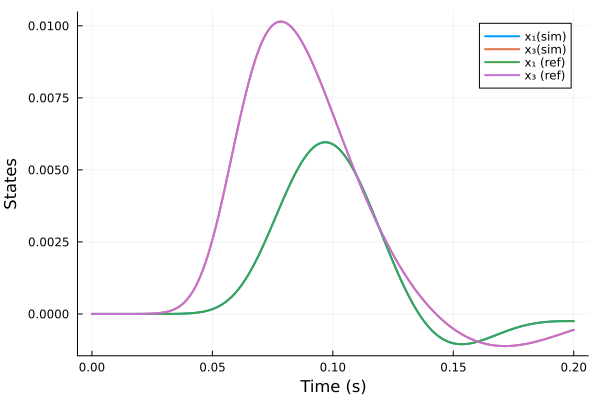

In [ ]:
# SETTING UP THE SIMULATION
# defining model settings & parameters
dt = 0.001
t = 0:dt:0.2
κ1 = 80
κ2 = 50
f1 = 50
f2 = 50
af = 3000
ab = 1000
c = 1.0
μ = 0.05
o = 0.01

# defining matrices
A = [0 1 0 0; -κ1^2 -f1 af 0; 0 0 0 1; ab 0 -κ2^2 -f2];
C = [0;0;0;c];

# preforming pdf
u = pdf.(Normal(μ, o), t)

# Euler integration
x = zeros(4, length(t))

for i in 1:(length(t)-1)
    dx = A * x[:, i] + C * u[i]
    x[:, i+1] = x[:, i] + dt * (A * x[:,i] + C * u[i])
end

# COMPARING TO REFERENCE
df = CSV.read("x_condition_1.csv", DataFrame; header=false)
X_ref = Matrix(df)

# getting x1 and x3 from reference data
x1_ref = X_ref[1, :]
x3_ref = X_ref[3, :]

# plotting simulated and reference x₁ and x₃
plot(t, x[1, :], label="x₁(sim)", lw=2)
plot!(t, x[3, :], label="x₃(sim)", lw=2, xlabel="Time (s)", ylabel="States")
plot!(t, x1_ref, label="x₁ (ref)", lw=2)
plot!(t, x3_ref, label="x₃ (ref)", lw=2, xlabel="Time (s)", ylabel="States")
# note: the simulated and reference x1 and x3 overlap, so it looks like only the references have been plotted


In [73]:
x1_sim = x[1, :]
x3_sim = x[3, :]

println("x1 max abs diff: ", sum(abs.(x1_sim .- x1_ref)))
println("x3 max abs diff: ", sum(abs.(x3_sim .- x3_ref)))

x1 max abs diff: 2.360727632338637e-16
x3 max abs diff: 5.146501735768876e-16


### b) Parameter identification (8 Points)
When looking at *x_condition_2.csv*, it becomes apparent that something in the system has changed. 

In fact, we have changed one of the following parameter values: $\kappa_1$, $\kappa_2$, $a_f$, $a_b$. Try to find out which!
Compare the four different hypotheses in terms of the residual sum of squares or explained variance

$$v_E = 1 − \frac{var(y − y_p)}{var(y)}$$

Which model best explains the data? What is the ensuing parameter estimate?

*Hint: You can use a simple grid-search over the parameters. The true model should at least reach 98% of explained variance.*

In [ ]:
csv = CSV.read("x_condition_2.csv", DataFrame; header=false)
X_cond2 = Matrix(csv)

# function to simulate the model (based on 3.3a)
function simulate_model(κ1, κ2, af, ab; dt=0.001, t=0:0.001:0.2, μ=0.05, o=0.01, c=1.0)
    A = [0 1 0 0; -κ1^2 -f1 af 0; 0 0 0 1; ab 0 -κ2^2 -f2];
    C = [0;0;0;c];
    u = pdf.(Normal(μ, o), t)
    x = zeros(4, length(t))
    for i in 1:(length(t)-1)
        dx = A * x[:, i] + C * u[i]
        x[:, i+1] = x[:, i] + dt * (A * x[:,i] + C * u[i])
    end
    return x
end

# function to calculate explained variance
function variance(y, y_hat)
    return 1 - var(y .- y_hat) / var(y)
end

# grid search over k1 (originally 80)
κ1_vals = 50:5:110
k1_ver = Float64[]

for κ1_test in κ1_vals
    x_sim = simulate_model(κ1_test, 50, 3000, 1000)
    ve = variance(X_cond2, x_sim)
    push!(k1_ver, ve)
end

# grid search over k2 (originally 50)
κ2_vals = 20:5:80
k2_ver = Float64[]

for κ2_test in κ2_vals
    x_sim = simulate_model(80, κ2_test, 3000, 1000)
    ve = variance(X_cond2, x_sim)
    push!(k2_ver, ve)
end

# grid search over af (originally 3000)
af_vals = 2000:100:4000
af_ver = Float64[]

for af_test in af_vals
    x_sim = simulate_model(80, 50, af_test, 1000)
    ve = variance(X_cond2, x_sim)
    push!(af_ver, ve)
end

# grid search over ab (originally 1000)
ab_vals = 0:100:2000
ab_ver = Float64[]

for ab_test in ab_vals
    x_sim = simulate_model(80, 50, 3000, ab_test)
    ve = variance(X_cond2, x_sim)
    push!(ab_ver, ve)
end

println("Maximum explained variance: ", maximum(k1_ver))
println("Maximum explained variance: ", maximum(k2_ver))
println("Maximum explained variance: ", maximum(af_ver))
println("Maximum explained variance: ", maximum(ab_ver))

# the output from above reveals that the max explained verience (100%) occurs when changing k1
# to get the values of k1 that give the max explained variance, we can use argmax
κ1_vals[argmax(k1_ver)]
println("Optimal κ1: ", κ1_vals[argmax(k1_ver)])

# checking to ensure k1 = 100 gives the expected max varience (it does)
test_sim = simulate_model(100, 50, 3000, 1000)
ver = variance(X_cond2, test_sim)
println("Variance for k1 = 100: ", ver)

Maximum explained variance: 1.0
Maximum explained variance: 0.90284772498048
Maximum explained variance: 0.9558169159758355
Maximum explained variance: 0.900999738183213
Optimal κ1: 100
Variance for k1 = 100: 1.0


The above computations show that changing k1 results in the max explained variance of 100%, which points to this being the culprit parameter. We can then use argmax to find the value of k1 that results in such high varience, which outputs 100. Therefore, setting k1 to 100 is likely what results in the data observed in x_condition_2.csv

### c) Forward model (2 Points)
We have told you to look at the output of states $x_1$ and $x_3$. What would be the analogy in terms of a leadfield matrix $L$, such that
$$ y(t) = Lx(t)$$
corresponds to the activity of these two states?

Consider the state vector \( x(t) \) given by:

$$
x(t) =
\begin{bmatrix}
x_1(t) \\[6pt]
x_2(t) \\[6pt]
x_3(t) \\[6pt]
x_4(t)
\end{bmatrix}
$$

Suppose we only observe (measure) the states \( x_1(t) \) and \( x_3(t) \). The observed signal \( y(t) \) is therefore:

$$
y(t) =
\begin{bmatrix}
x_1(t) \\[6pt]
x_3(t)
\end{bmatrix}
$$

To represent this mapping in terms of a leadfield matrix \( L \), such that:

$$
y(t) = L\,x(t),
$$

we define \( L \) as follows:

$$
L =
\begin{bmatrix}
1 & 0 & 0 & 0 \\[6pt]
0 & 0 & 1 & 0
\end{bmatrix}
$$

This matrix selects and outputs the states we are interested in and ignores the others.